In [1]:
import pandas as pd
from fbprophet import Prophet

In [3]:
df = pd.read_csv('^NSEI.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

              ds             y
0     2016-03-08   7485.299805
1     2016-03-09   7531.799805
2     2016-03-10   7486.149902
3     2016-03-11   7510.200195
4     2016-03-14   7538.750000
...          ...           ...
1229  2021-03-01  14761.549805
1230  2021-03-02  14919.099609
1231  2021-03-03  15245.599609
1232  2021-03-04  15080.750000
1233  2021-03-05  14938.099609

[1234 rows x 2 columns]


In [4]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = prophet.make_future_dataframe(periods=365)
print(future)

             ds
0    2016-03-08
1    2016-03-09
2    2016-03-10
3    2016-03-11
4    2016-03-14
...         ...
1594 2022-03-01
1595 2022-03-02
1596 2022-03-03
1597 2022-03-04
1598 2022-03-05

[1599 rows x 1 columns]


In [6]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
1399,2021-08-18,16088.497806,14033.141985,18027.028959
1400,2021-08-19,16116.465168,14167.875572,18085.116534
1401,2021-08-20,16128.193713,14093.990362,18015.076080
1402,2021-08-21,15940.636776,13716.905138,17901.944789
1403,2021-08-22,15960.207415,13858.791680,18031.290599
...,...,...,...,...
1594,2022-03-01,19633.003640,12290.854128,25775.620464
1595,2022-03-02,19614.795160,12253.540584,25867.748879
1596,2022-03-03,19603.186854,12433.151473,25854.095345
1597,2022-03-04,19572.828932,12227.669325,25668.172631


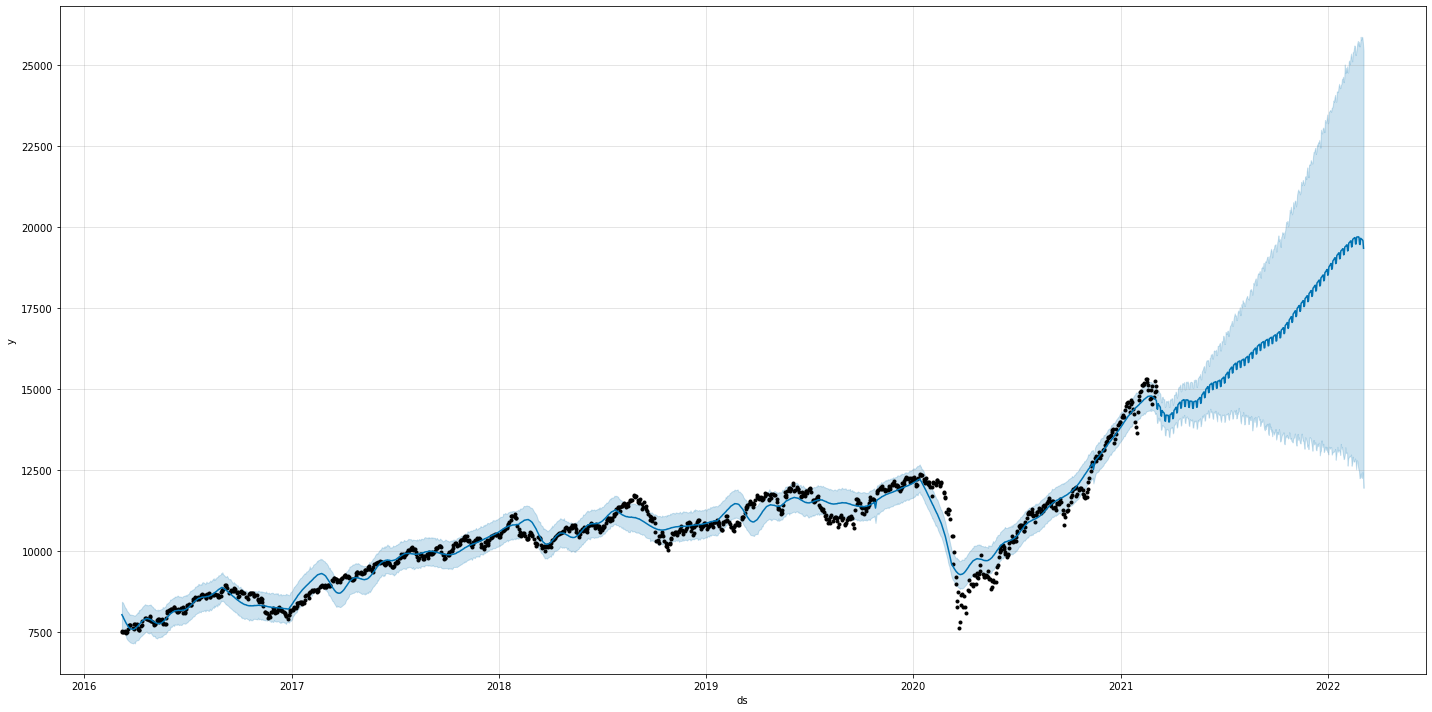

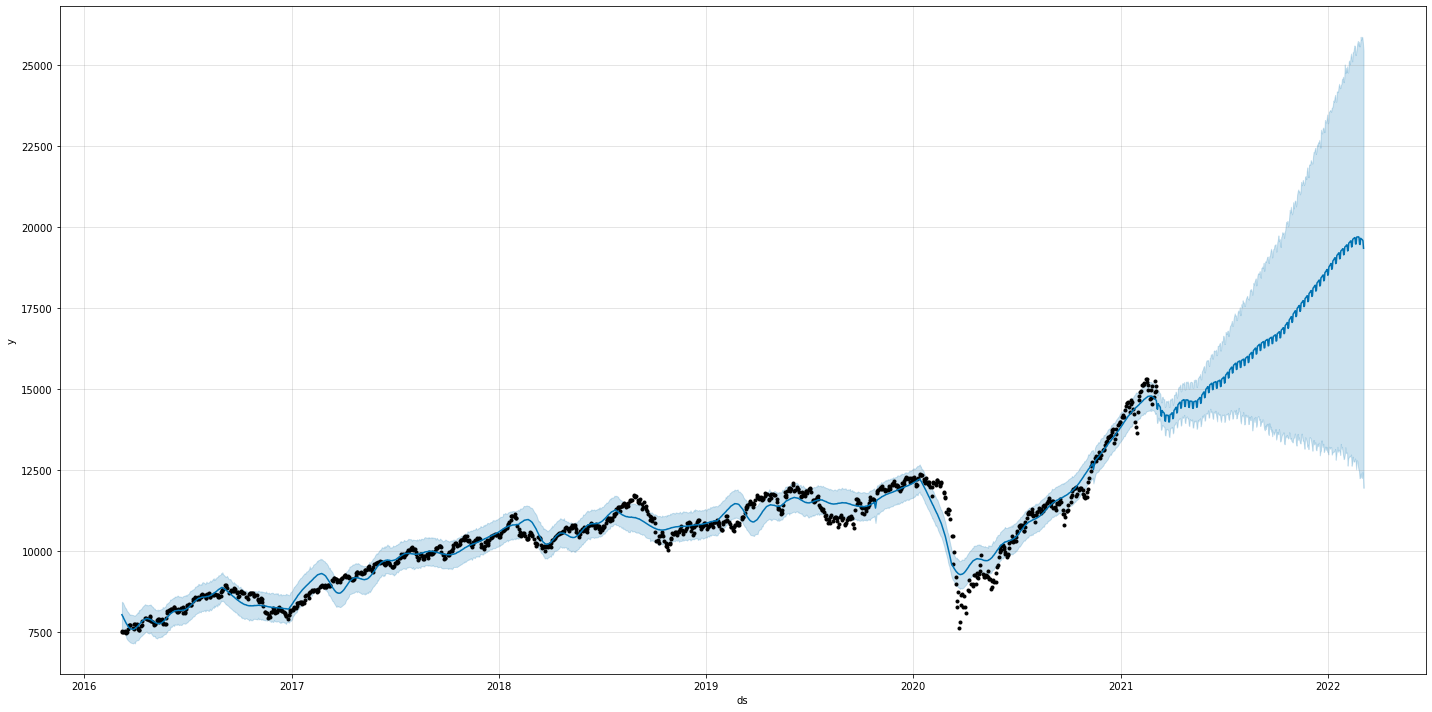

In [7]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))